# GRIPJUL21 : DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

# The Sparks Foundation

# Task domain : Computer Vision and Internet of Things

# Task 2 : Color Identification in Images

Implement an image color detector which identifies all the colors in an
image or video.

# Author : Anu R Sudheesh

In [ ]:
#importing required libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import cv2


# Importing image

The type of this input is <class 'numpy.ndarray'>
Shape: (1333, 2000, 3)


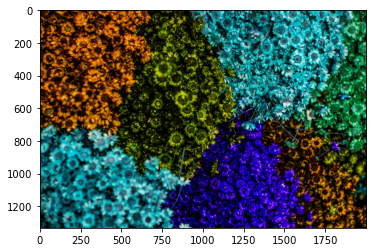

In [15]:
# import image 
image = cv2.imread('F:\Internship\Image 1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)



**Convert image from BGR color space to RGB**


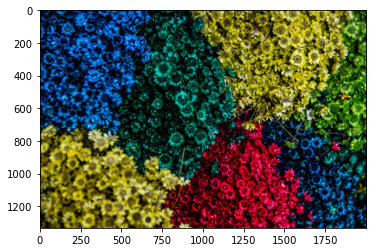

In [16]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

**Convert image to gray scale**

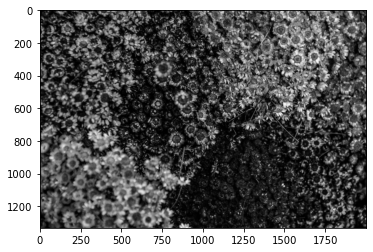

In [17]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

**Resize the image**

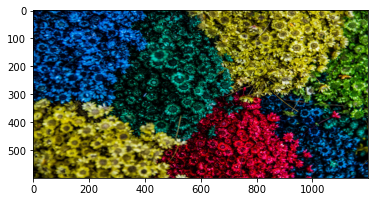

In [18]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# Color identification

**Convert RGB to hex**

In [19]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

**Read image in RGB color space**

In [20]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

**Get colors from an image**

In [25]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors



[array([ 4.48858175, 62.70097615, 81.95423744]),
 array([157.45906907, 155.28943905,  24.7231692 ]),
 array([ 9.47071839, 16.58725652, 16.07754288]),
 array([83.04073738, 89.67524811, 14.4450699 ]),
 array([201.61364542,   9.03505976,  57.31105578]),
 array([101.05222479,   3.25693441,  15.65429067]),
 array([  6.05849156, 117.56554594, 176.39188866]),
 array([197.15638569, 198.13422668, 107.59874233])]

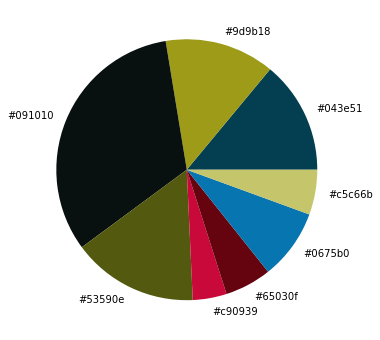

In [24]:
get_colors(get_image('F:\Internship\Image 1.jpg'), 8, True)

[array([251.60130325, 191.17352819,  94.38140796]),
 array([113.00644966,   6.65929357,  17.58735174]),
 array([242.23387927,  99.5457673 ,  85.52738981]),
 array([251.90478921, 239.60406642, 231.42994328]),
 array([248.41283426, 143.93211471, 130.46079318]),
 array([224.04528921,  98.3878468 ,  20.65138007]),
 array([182.16852509,  20.99971038,  50.89305626]),
 array([251.00876942, 205.18685161, 168.71682811])]

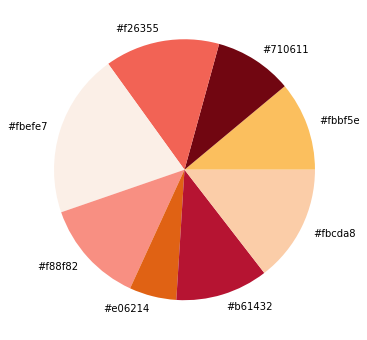

In [27]:
get_colors(get_image('F:\Internship\Image 2.jpeg'), 8, True)

# Search images using color

**Get all images from the image directory**

In [70]:
IMAGE_DIRECTORY = 'F:\Internship\Images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

**Show all images**

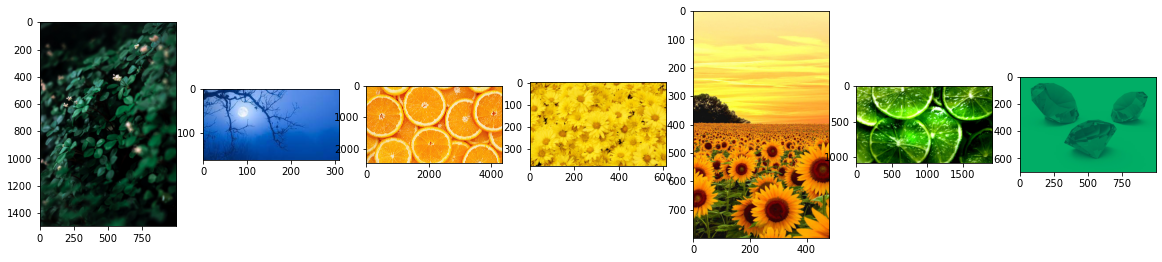

In [71]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

**Match images with color**

In [73]:
#to filter all images that match the selected color
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

**Show selected images**

In [38]:
#We define a function show_selected_images that iterates over all images, calls the above function to filter them based on color and displays them on the screen using imshow

In [75]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

# Filter results

**Searching for BLUE**

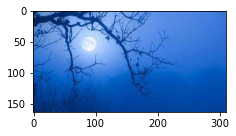

In [78]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['BLUE'], 60, 5)

**Searching for GREEN**

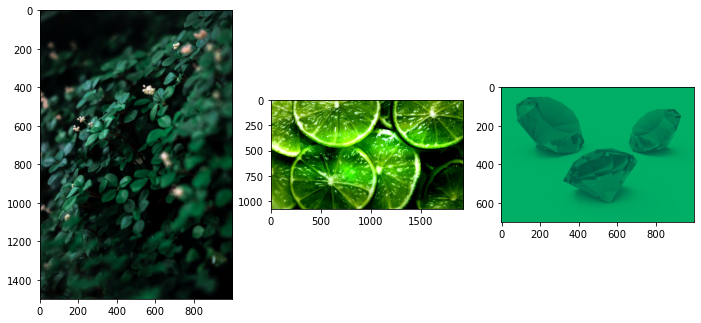

In [76]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['GREEN'], 60, 5)

**Searching for YELLOW**

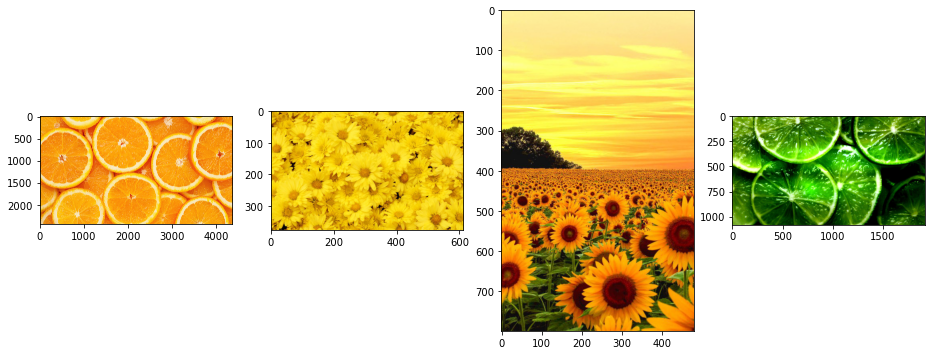

In [77]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['YELLOW'], 60, 5)

**CONCLUSION**

Extracted colors from an image using KMeans algorithm and then used this to search images based on colors.